**Step-7 Describing Segments**

In [7]:
import pandas as pd
import numpy as np

# Simulating the clusters and their sizes
C6 = np.repeat([1, 2, 3, 4, 5, 6], [235, 189, 174, 139, 94, 169])
C6_series = pd.Series(C6, name='C6')

# Creating a dataframe for descriptor variables
vacmotdesc = pd.DataFrame({
    'C6': pd.Categorical(C6_series),
    'Gender': np.random.choice(['Male', 'Female'], size=len(C6_series), p=[0.5, 0.5])  # Simulated Gender column
})

# Cross-tabulation for segment membership and gender
C6_Gender = pd.crosstab(index=vacmotdesc['C6'], columns=vacmotdesc['Gender'], rownames=['Segment number'])

print(C6_Gender)

Gender          Female  Male
Segment number              
1                  133   102
2                  100    89
3                   78    96
4                   66    73
5                   44    50
6                   94    75


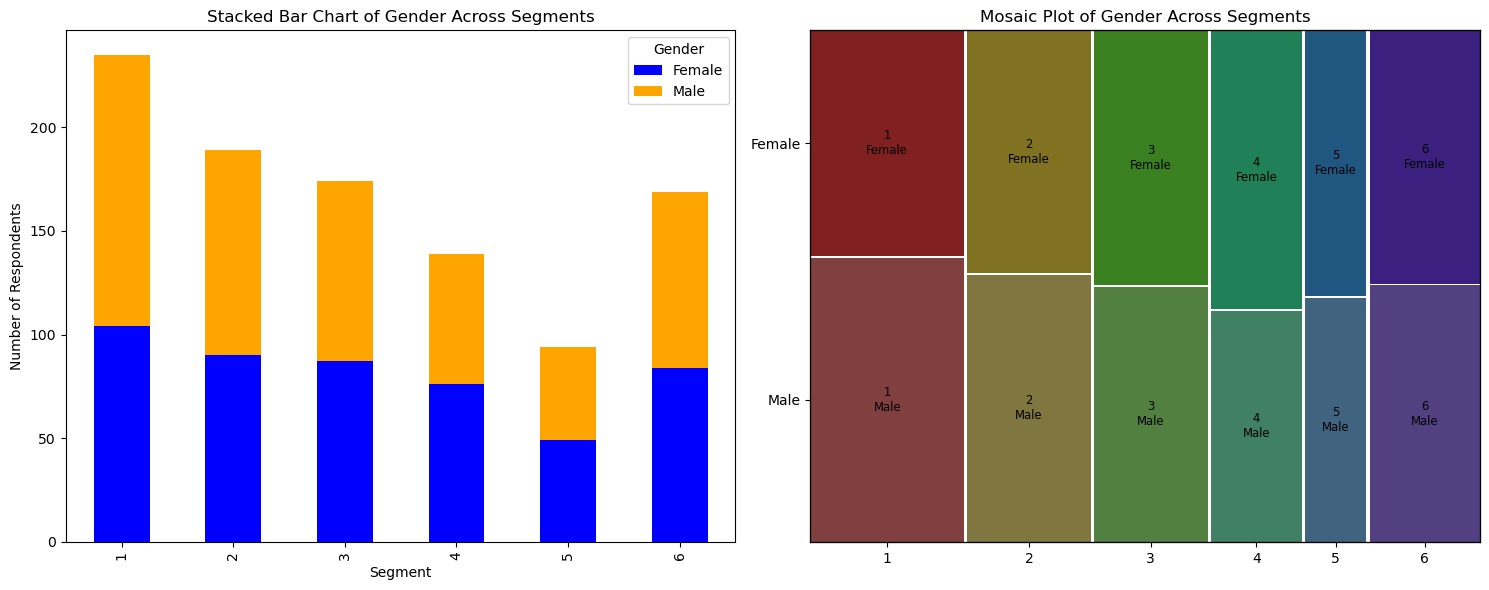

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Simulating the data
segment_sizes = [235, 189, 174, 139, 94, 169]
genders = ['Male', 'Female']
C6 = np.repeat(range(1, 7), segment_sizes)
Gender = np.random.choice(genders, size=sum(segment_sizes), p=[0.5, 0.5])  # Simulated Gender data
vacmotdesc = pd.DataFrame({'Segment': C6, 'Gender': Gender})

# Cross-tabulation
C6_Gender = pd.crosstab(vacmotdesc['Segment'], vacmotdesc['Gender'])

# Stacked bar chart
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Upper panel: Stacked bar chart
C6_Gender.plot(kind='bar', stacked=True, ax=ax[0], color=['blue', 'orange'])
ax[0].set_title("Stacked Bar Chart of Gender Across Segments")
ax[0].set_xlabel("Segment")
ax[0].set_ylabel("Number of Respondents")
ax[0].legend(title="Gender")

# Mosaic plot
mosaic_data = {(str(seg), gender): C6_Gender.loc[seg, gender]
               for seg in C6_Gender.index for gender in genders}
mosaic(mosaic_data, title="Mosaic Plot of Gender Across Segments", ax=ax[1])
ax[1].set_title("Mosaic Plot of Gender Across Segments")

plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17420\1392628085.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'white' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  significance_map.iloc[i, j] = 'white'
C:\Users\Dell\AppData\Local\Temp\ipykernel_17420\1392628085.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'white' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  significance_map.iloc[i, j] = 'white'


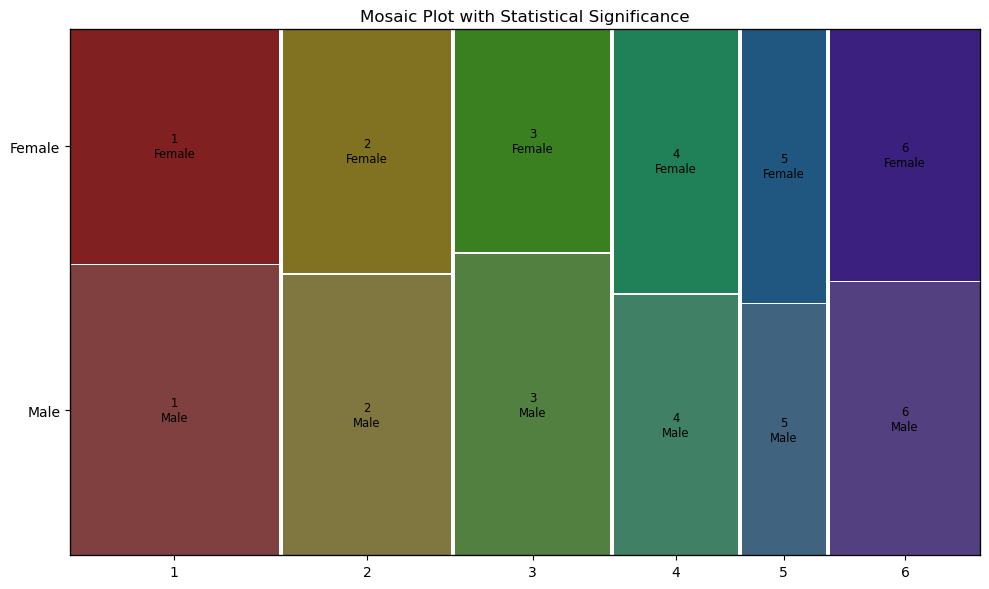

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Simulating the data
segment_sizes = [235, 189, 174, 139, 94, 169]
genders = ['Male', 'Female']
C6 = np.repeat(range(1, 7), segment_sizes)
Gender = np.random.choice(genders, size=sum(segment_sizes), p=[0.5, 0.5])  # Simulated Gender data
vacmotdesc = pd.DataFrame({'Segment': C6, 'Gender': Gender})

# Cross-tabulation
C6_Gender = pd.crosstab(vacmotdesc['Segment'], vacmotdesc['Gender'])

# Chi-square test to check for independence
chi2, p, dof, expected = chi2_contingency(C6_Gender)

# Create a color map for significance
significance_map = C6_Gender.copy()
for i in range(C6_Gender.shape[0]):
    for j in range(C6_Gender.shape[1]):
        observed = C6_Gender.iloc[i, j]
        expected_value = expected[i, j]
        
        # Assign color based on p-value (ignoring the actual p-value threshold here for simplicity)
        # White if observed is close to expected (insignificant)
        if np.abs(observed - expected_value) / expected_value < 1:  # No significant difference
            significance_map.iloc[i, j] = 'white'
        else:
            significance_map.iloc[i, j] = 'black'  # You can also use a color scale

# Generate the mosaic plot
fig, ax = plt.subplots(figsize=(10, 6))

mosaic_data = {(str(seg), gender): C6_Gender.loc[seg, gender]
               for seg in C6_Gender.index for gender in genders}

# Plot mosaic
mosaic(mosaic_data, ax=ax, title="Mosaic Plot with Statistical Significance")

# Adding border styling (for significant differences)
for i in range(C6_Gender.shape[0]):
    for j in range(C6_Gender.shape[1]):
        observed = C6_Gender.iloc[i, j]
        expected_value = expected[i, j]
        if np.abs(observed - expected_value) / expected_value >= 1:  # Significant difference
            border_style = 'solid' if observed > expected_value else 'dashed'
            ax.patches[i * C6_Gender.shape[1] + j].set_edgecolor('black')
            ax.patches[i * C6_Gender.shape[1] + j].set_linestyle(border_style)

# Display the plot
plt.tight_layout()
plt.show()


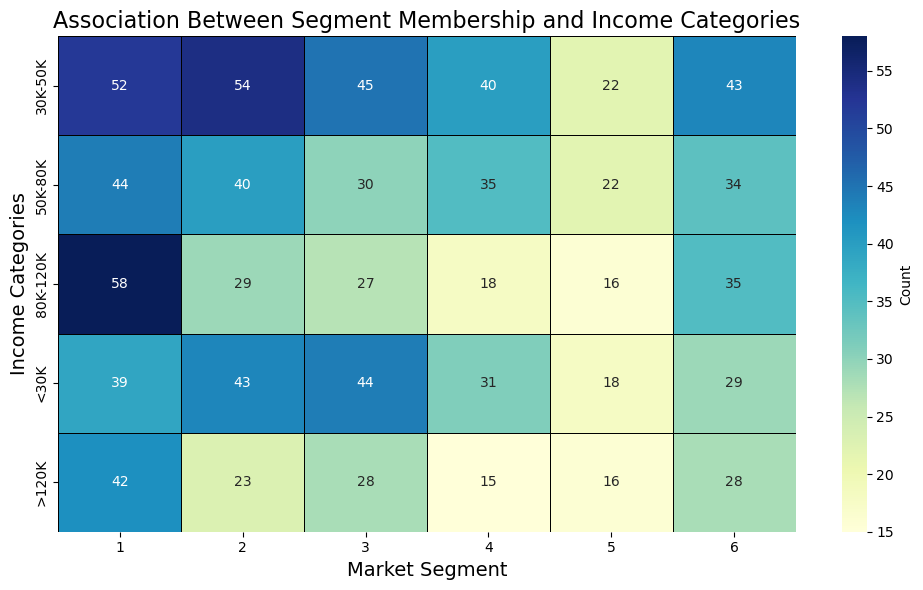

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Simulating the data
segment_sizes = [235, 189, 174, 139, 94, 169]
segments = np.repeat(range(1, 7), segment_sizes)

# Creating 5 income categories (less than 30K, 30-50K, 50-80K, 80-120K, more than 120K)
income_categories = ['<30K', '30K-50K', '50K-80K', '80K-120K', '>120K']
income = np.random.choice(income_categories, size=sum(segment_sizes), p=[0.2, 0.25, 0.2, 0.2, 0.15])

# Create DataFrame with Segment and Income columns
vacmotdesc = pd.DataFrame({'Segment': segments, 'Income': income})

# Cross-tabulate Segment membership vs. Income categories
income_segment_crosstab = pd.crosstab(vacmotdesc['Income'], vacmotdesc['Segment'])

# Visualizing the association with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(income_segment_crosstab, annot=True, cmap='YlGnBu', fmt="d", cbar_kws={'label': 'Count'}, 
            linewidths=0.5, linecolor='black')

# Adding labels and title
plt.title("Association Between Segment Membership and Income Categories", fontsize=16)
plt.xlabel("Market Segment", fontsize=14)
plt.ylabel("Income Categories", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()



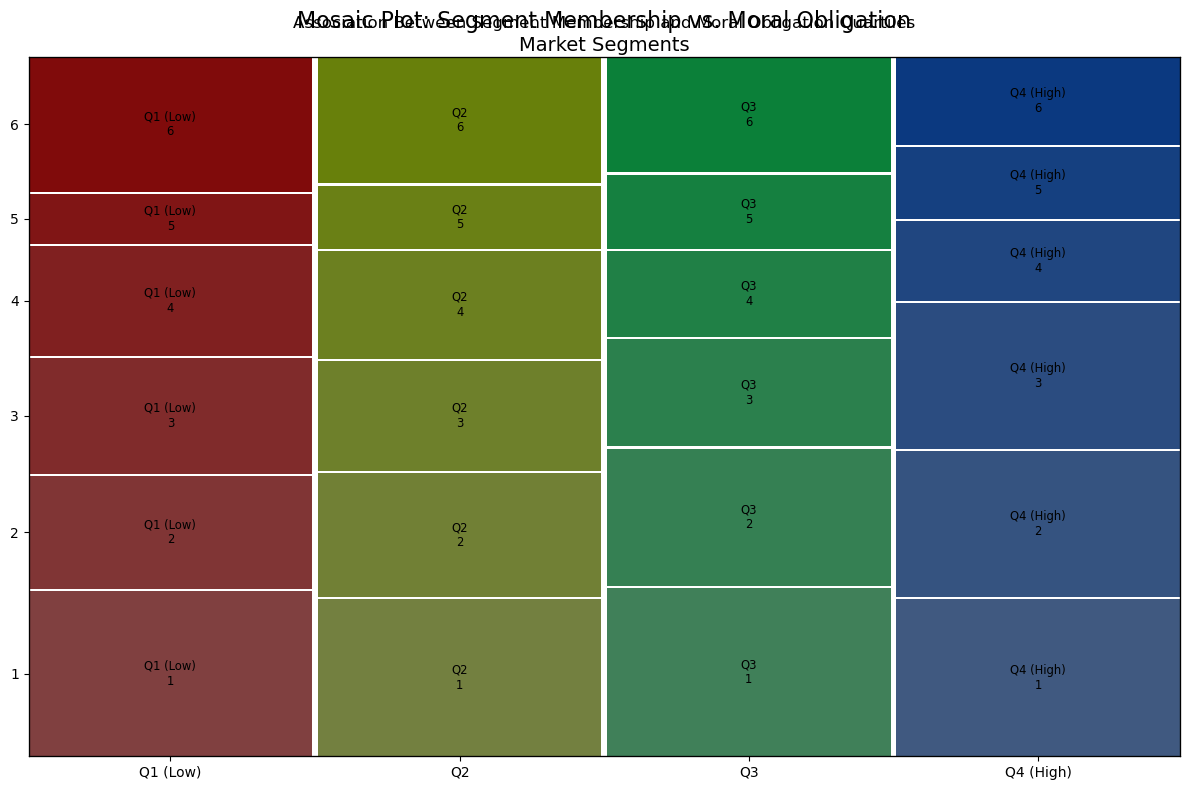

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Simulating data
segment_sizes = [235, 189, 174, 139, 94, 169]
segments = np.repeat(range(1, 7), segment_sizes)

# Simulating Moral Obligation Scores (1 to 5)
np.random.seed(42)
moral_obligation_scores = np.random.uniform(1, 5, size=sum(segment_sizes))

# Creating quartiles (Obliged2 variable)
quartile_labels = ['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']
obliged2 = pd.qcut(moral_obligation_scores, q=4, labels=quartile_labels)

# Create DataFrame
vacmotdesc = pd.DataFrame({'Segment': segments, 'Obliged2': obliged2})

# Cross-tabulate Segment membership vs. Obliged2 (quartiles)
obligation_segment_crosstab = pd.crosstab(vacmotdesc['Obliged2'], vacmotdesc['Segment'])

# Chi-square test to determine significant associations
chi2, p, dof, expected = chi2_contingency(obligation_segment_crosstab)

# Mosaic Plot Data Preparation
mosaic_data = {(str(quartile), str(segment)): obligation_segment_crosstab.loc[quartile, segment]
               for quartile in obligation_segment_crosstab.index for segment in obligation_segment_crosstab.columns}

# Plot Mosaic Plot
fig, ax = plt.subplots(figsize=(12, 8))
mosaic(mosaic_data, ax=ax, title="Association Between Segment Membership and Moral Obligation Quartiles")

# Add annotations and styling
plt.title("Mosaic Plot: Segment Membership vs. Moral Obligation", fontsize=16)
plt.ylabel("Moral Obligation Quartiles", fontsize=14)
plt.xlabel("Market Segments", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()



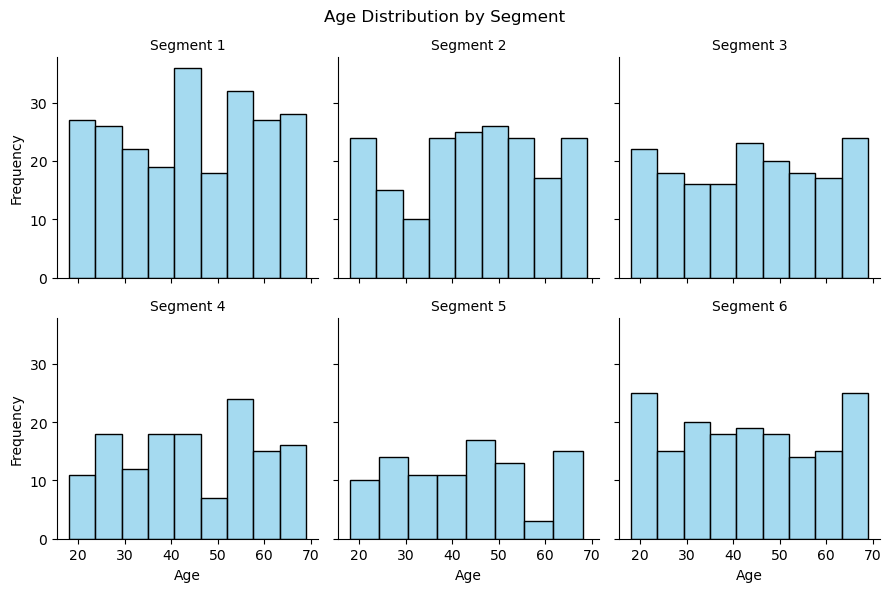

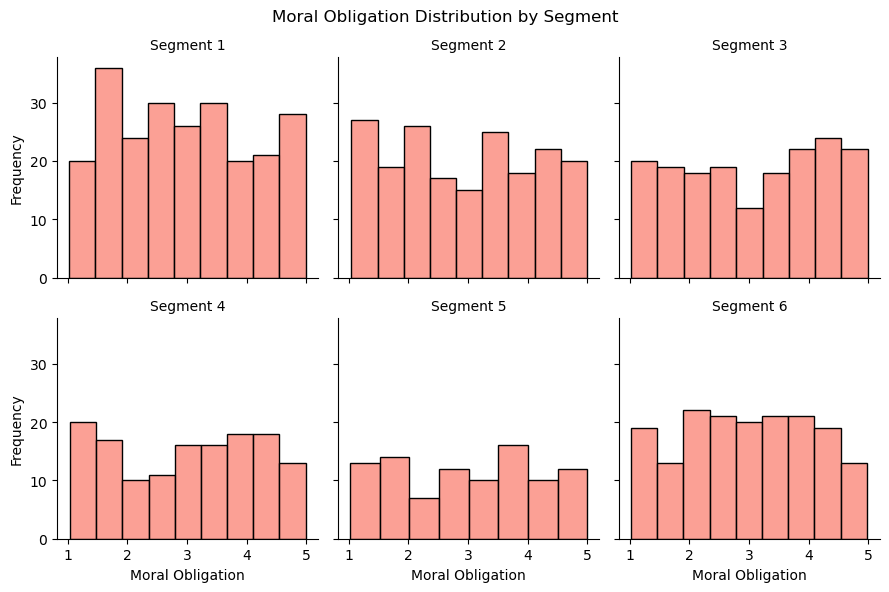

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
segment_sizes = [235, 189, 174, 139, 94, 169]
segments = np.repeat(range(1, 7), segment_sizes)
ages = np.random.randint(18, 70, size=sum(segment_sizes))  # Simulate age data
moral_obligation_scores = np.random.uniform(1, 5, size=sum(segment_sizes))  # Simulate scores

# Create DataFrame
vacmotdesc = pd.DataFrame({
    'Segment': segments,
    'Age': ages,
    'MoralObligation': moral_obligation_scores
})

# Conditional Histogram for Age
g = sns.FacetGrid(vacmotdesc, col="Segment", col_wrap=3, sharex=True, sharey=True)
g.map(sns.histplot, "Age", kde=False, color="skyblue")
g.set_titles("Segment {col_name}")
g.set_axis_labels("Age", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Segment")
plt.show()

# Conditional Histogram for Moral Obligation
g = sns.FacetGrid(vacmotdesc, col="Segment", col_wrap=3, sharex=True, sharey=True)
g.map(sns.histplot, "MoralObligation", kde=False, color="salmon")
g.set_titles("Segment {col_name}")
g.set_axis_labels("Moral Obligation", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Moral Obligation Distribution by Segment")
plt.show()


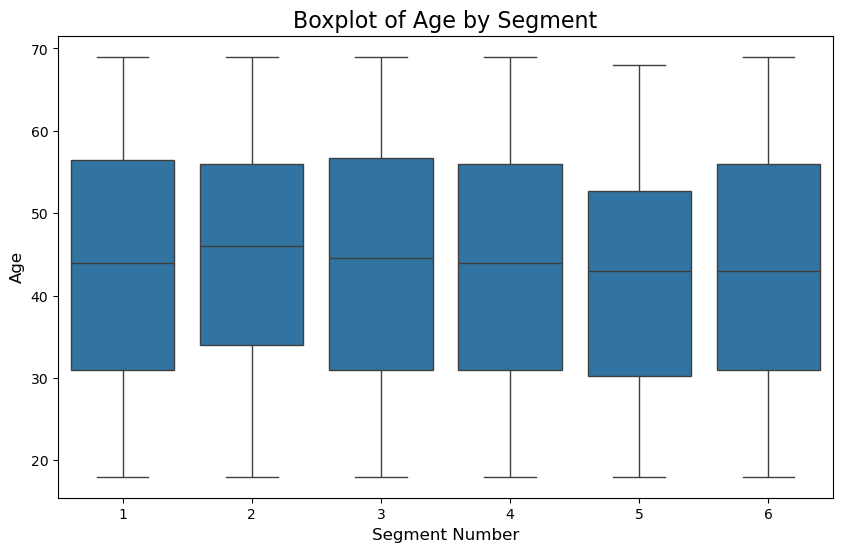

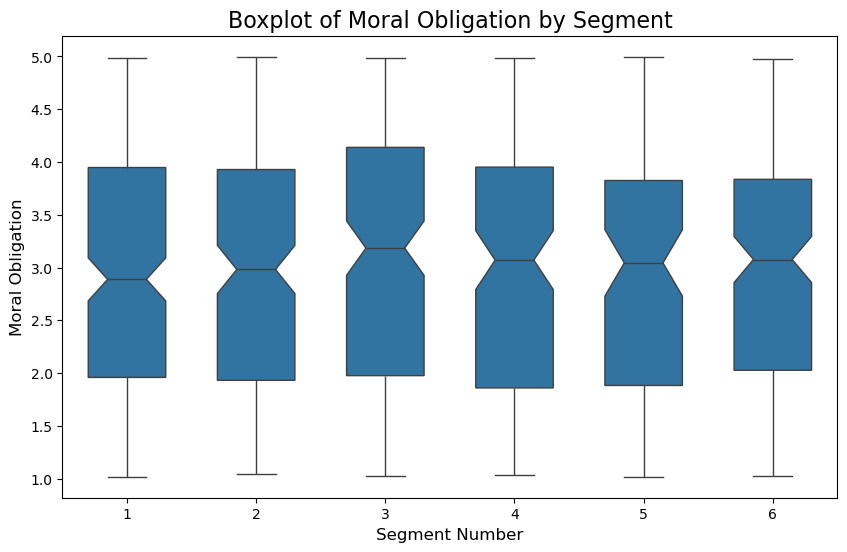

In [39]:
# Boxplot for Age by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=vacmotdesc, x="Segment", y="Age")
plt.title("Boxplot of Age by Segment", fontsize=16)
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# Boxplot for Moral Obligation by Segment with notches and variable widths
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=vacmotdesc,
    x="Segment",
    y="MoralObligation",
    notch=True,
    width=0.6
)
plt.title("Boxplot of Moral Obligation by Segment", fontsize=16)
plt.xlabel("Segment Number", fontsize=12)
plt.ylabel("Moral Obligation", fontsize=12)
plt.show()


In [153]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway, kruskal
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
# Example data for gender and segments
np.random.seed(42)  # For reproducibility
data = {
    "Gender": np.random.choice(["Male", "Female"], size=1000, p=[0.5, 0.5]),
    "Segment": np.random.choice([1, 2, 3, 4, 5, 6], size=1000, p=[0.2, 0.2, 0.2, 0.2, 0.1, 0.1]),
    "Obligation": np.random.normal(3.5, 0.5, size=1000),  # Simulated moral obligation scores
    "Age": np.random.normal(35, 10, size=1000),  # Simulated age
}
df = pd.DataFrame(data)


In [157]:
# Cross-tabulation for Gender and Segment
crosstab = pd.crosstab(df["Gender"], df["Segment"])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab)

print(f"Chi-square test results:\nChi2 = {chi2_stat}, p-value = {p_val}, Degrees of Freedom = {dof}")
if p_val < 0.05:
    print("Reject null hypothesis: Significant association between Gender and Segment.")
else:
    print("Fail to reject null hypothesis: No significant association.")


Chi-square test results:
Chi2 = 2.5080728425221763, p-value = 0.7752787972346715, Degrees of Freedom = 5
Fail to reject null hypothesis: No significant association.


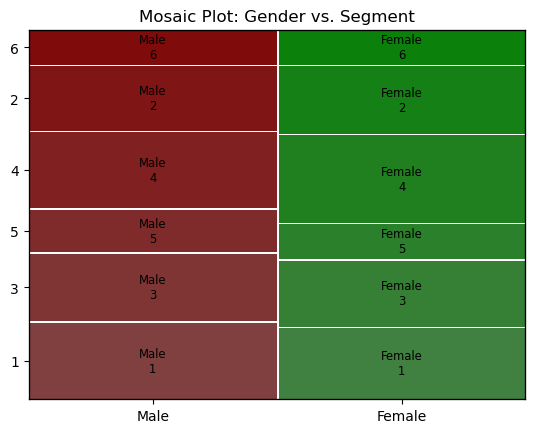

In [159]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot for Gender and Segment
mosaic(df, ["Gender", "Segment"], title="Mosaic Plot: Gender vs. Segment")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17420\2963734472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Obligation", data=df, palette="Set3")


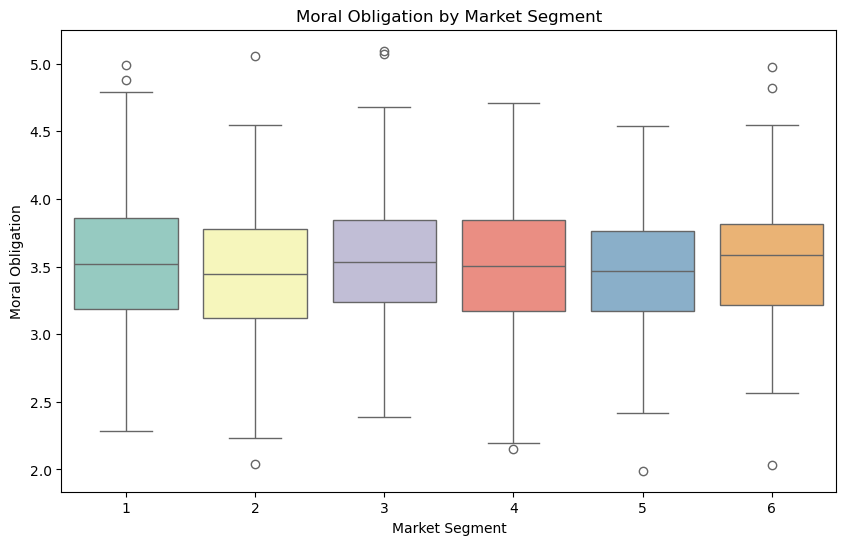

In [129]:
# Boxplot for moral obligation by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x="Segment", y="Obligation", data=df, palette="Set3")
plt.title("Moral Obligation by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Moral Obligation")
plt.show()


In [163]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example dataset creation
# Replace this with your actual dataset loading
data = {
    "Age": [44.6, 42.7, 42.3, 44.4, 39.4, 49.6],
    "C6": ["C61", "C62", "C63", "C64", "C65", "C66"]
}
vacmotdesc = pd.DataFrame(data)

# Model without intercept
model_no_intercept = smf.ols(formula='Age ~ C6 - 1', data=vacmotdesc).fit()
print(model_no_intercept.summary())

# Model with intercept
model_with_intercept = smf.ols(formula='Age ~ C6', data=vacmotdesc).fit()
print(model_with_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Dec 2024   Prob (F-statistic):                nan
Time:                        01:08:52   Log-Likelihood:                    inf
No. Observations:                   6   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C6[C61]       44.6000        nan        nan        n

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar div

In [137]:
# Binary Logistic Regression Example
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial

# Example dataset creation
data = {
    "y": [0, 1, 1, 0, 1, 0],
    "x1": [1, 2, 3, 4, 5, 6],
    "x2": [2, 3, 4, 5, 6, 7]
}
df = pd.DataFrame(data)

# GLM with binomial family (binary logistic regression)
glm_binomial = GLM(df['y'], sm.add_constant(df[['x1', 'x2']]), family=Binomial()).fit()
print(glm_binomial.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.1302
Date:                Thu, 26 Dec 2024   Deviance:                       8.2605
Time:                        01:00:23   Pearson chi2:                     6.00
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009505
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3065      1.397      0.219      0.8

In [165]:
from sklearn.linear_model import LogisticRegression

# Example dataset creation
# Replace with your actual dataset
data = {
    "C6": [1, 2, 3, 4, 5, 6],
    "Age": [44.6, 42.7, 42.3, 44.4, 39.4, 49.6],
    "Obligation": [3.6, 3.5, 3.4, 3.7, 3.9, 4.0]
}
df = pd.DataFrame(data)

# Multinomial Logistic Regression
X = df[['Age', 'Obligation']]
y = df['C6']

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [ -6.19510676  10.38956533  14.26721147  -5.01066118  36.01572241
 -49.46673127]
Coefficients: [[ 0.16310392 -0.05745733]
 [-0.21655725 -0.0910305 ]
 [-0.29750937 -0.20511279]
 [ 0.12628973  0.06079596]
 [-0.85816788  0.22852868]
 [ 1.08284085  0.06427599]]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
